# LOAD FILES

In [1]:
!pip install yahooquery pyfolio
import os
import pandas as pd
from google.colab import drive
import pandas as pd
import numpy as np
import yahooquery as yq
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from pyfolio import timeseries

# Mount Google Drive
drive.mount('/content/drive')

# Specify the folder path inside Google Drive
folder_path = '/content/drive/My Drive/AFP/Code/Download_This_Folder/results/old'  # Change this to your specific folder

# Walk through all files and directories in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):  # Ensure the file is a CSV
            file_path = os.path.join(root, file)
            print(f'Reading: {file_path}')

            # Create a variable name starting with 'df_' (remove '.csv' and replace spaces with underscores)
            df_name = 'df_' + file.replace('.csv', '').replace(' ', '_').replace('.', '_').replace('(', '_').replace(')', '_')
            # Read the CSV into a DataFrame and dynamically assign to the variable
            globals()[df_name] = pd.read_csv(file_path)

            print(f'Created DataFrame: {df_name}')

# ALL EQUITIES DATAFRAMES
df_equities_strat_better_returns_trailing_stop = df_strat_better_returns_trailing_stop
df_equities_MICHELLE_signal_test_returns = df_MICHELLE_signal_test_returns_2 #df_MICHELLE_signal_test_returns

df_equities_strat_better_returns_trailing_stop['date'] = pd.to_datetime(df_equities_strat_better_returns_trailing_stop['index'])
df_equities_MICHELLE_signal_test_returns['date'] = pd.to_datetime(df_equities_MICHELLE_signal_test_returns['index'].astype(str).str[:10])

cols_needed_equities = ["date","return"]
df_equities_strat_better_returns_trailing_stop = df_equities_strat_better_returns_trailing_stop[cols_needed_equities]
df_equities_MICHELLE_signal_test_returns = df_equities_MICHELLE_signal_test_returns[cols_needed_equities]

# ALL OPTIONS DATAFRAMES
df_options_returns_old = df_returns_old
df_options_returns_old['date'] = pd.to_datetime(df_options_returns_old['date'])
df_options_returns_old.rename(columns={"equal_weighted_options_return":"return"},inplace=True)
cols_needed_options = ["date","return"]
df_options_returns_old = df_options_returns_old[cols_needed_options]
df_options_returns_old.rename(columns={"return":"daily_return"},inplace=True)

def ensure_and_compute_options_portfolio(df):
    # Ensure the necessary columns are present
    if not all(col in df.columns for col in ['date', 'ticker', 'daily_return']):
        raise ValueError(f"DataFrame is missing necessary columns: 'date', 'ticker', 'daily_return'.")

    df['date'] = pd.to_datetime(df['date'].astype(str).str[:10])
    # Group by date and calculate the equal-weighted daily return
    df_daily_returns = df.groupby('date')['daily_return'].mean().reset_index()
    return df_daily_returns

# List of original dataframes and their new names
option_dataframes = [
    ('df_daily_returns_delta_0_3_size_1', df_daily_returns_delta_0_3_size_1),
    ('df_daily_returns_delta_0_3_size_1_otm_True_direction_sell', df_daily_returns_delta_0_3_size_1_otm_True_direction_sell),
    ('df_daily_returns_delta_0_3_size_1_otm_True_direction_sell__1_', df_daily_returns_delta_0_3_size_1_otm_True_direction_sell__1_),
    ('df_daily_returns_delta_0_3_size_1_otm_True_direction_sell__2_', df_daily_returns_delta_0_3_size_1_otm_True_direction_sell__2_),
    ('df_daily_returns_delta_0_3_size_1_otm_False_dir_sell', df_daily_returns_delta_0_3_size_1_otm_False_dir_sell),
    ('df_daily_returns_delta_0_3_size_1_otm_True_dir_buy', df_daily_returns_delta_0_3_size_1_otm_True_dir_buy),
    ('df_daily_returns_delta_0_3_size_1_otm_True_dir_sell', df_daily_returns_delta_0_3_size_1_otm_True_dir_sell),
    ('df_daily_returns_delta_0_3_size_1_otm_False_dir_buy', df_daily_returns_delta_0_3_size_1_otm_False_dir_buy),
    ('df_daily_returns_delta_0_3_size_2_otm_True_dir_sell', df_daily_returns_delta_0_3_size_2_otm_True_dir_sell),
    ('df_daily_returns_delta_0_3_size_2_otm_True_dir_buy', df_daily_returns_delta_0_3_size_2_otm_True_dir_buy),
    ('df_daily_returns_delta_0_size_1_otm_True_dir_buy', df_daily_returns_delta_0_size_1_otm_True_dir_buy),
    ('df_daily_returns_delta_0_size_1_otm_True_dir_sell', df_daily_returns_delta_0_size_1_otm_True_dir_sell),
    ('df_daily_returns_delta_0_size_2_otm_True_dir_buy', df_daily_returns_delta_0_size_2_otm_True_dir_buy),
    ('df_daily_returns_delta_0_size_5_otm_True_dir_buy', df_daily_returns_delta_0_size_5_otm_True_dir_buy),
    ('df_daily_returns_delta_0_size_2_otm_True_dir_sell', df_daily_returns_delta_0_size_2_otm_True_dir_sell),
    ('df_daily_returns_delta_0_size_5_otm_True_dir_sell', df_daily_returns_delta_0_size_5_otm_True_dir_sell),
    ('df_daily_returns_delta_0_size_1_otm_True_dir_buy', df_daily_returns_delta_0_size_1_otm_True_dir_buy),
    ('df_daily_returns_delta_0_size_1_otm_True_dir_sell', df_daily_returns_delta_0_size_1_otm_True_dir_sell),
    ('df_daily_returns_delta_0_size_2_otm_True_dir_buy', df_daily_returns_delta_0_size_2_otm_True_dir_buy),
    ('df_daily_returns_delta_0_size_5_otm_True_dir_buy', df_daily_returns_delta_0_size_5_otm_True_dir_buy),
    ('df_daily_returns_delta_0_size_2_otm_True_dir_sell', df_daily_returns_delta_0_size_2_otm_True_dir_sell),
    ('df_daily_returns_delta_0_size_5_otm_True_dir_sell', df_daily_returns_delta_0_size_5_otm_True_dir_sell),
    ('df_daily_returns_delta_0_9_size_50_otm_False_dir_sell', df_daily_returns_delta_0_9_size_50_otm_False_dir_sell),
    ('df_daily_returns_delta_0_9_size_50_otm_True_dir_buy', df_daily_returns_delta_0_9_size_50_otm_True_dir_buy),
    ('df_daily_returns_delta_0_9_size_50_otm_True_dir_sell', df_daily_returns_delta_0_9_size_50_otm_True_dir_sell),
]

# Create the equal-weighted portfolio dataframes with the correct names
for name, df in option_dataframes:
    new_name = f"df_equal_weight_{name[3:]}"  # Strip 'df_' from the original name to make the new name
    globals()[new_name] = ensure_and_compute_options_portfolio(df)
    print(f"New DataFrame created: {new_name}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading: /content/drive/My Drive/AFP/Code/Download_This_Folder/results/old/returns_old.csv
Created DataFrame: df_returns_old
Reading: /content/drive/My Drive/AFP/Code/Download_This_Folder/results/old/daily_returns_delta_0.3_size_1.csv
Created DataFrame: df_daily_returns_delta_0_3_size_1
Reading: /content/drive/My Drive/AFP/Code/Download_This_Folder/results/old/strat_better_returns_trailing_stop.csv
Created DataFrame: df_strat_better_returns_trailing_stop
Reading: /content/drive/My Drive/AFP/Code/Download_This_Folder/results/old/daily_returns_delta_0.3_size_1_otm_True_direction_sell.csv
Created DataFrame: df_daily_returns_delta_0_3_size_1_otm_True_direction_sell
Reading: /content/drive/My Drive/AFP/Code/Download_This_Folder/results/old/daily_returns_delta_0.3_size_1_otm_True_direction_sell (1).csv
Created DataFrame: df_daily_returns_delta_0_3_size_1_otm_True_d

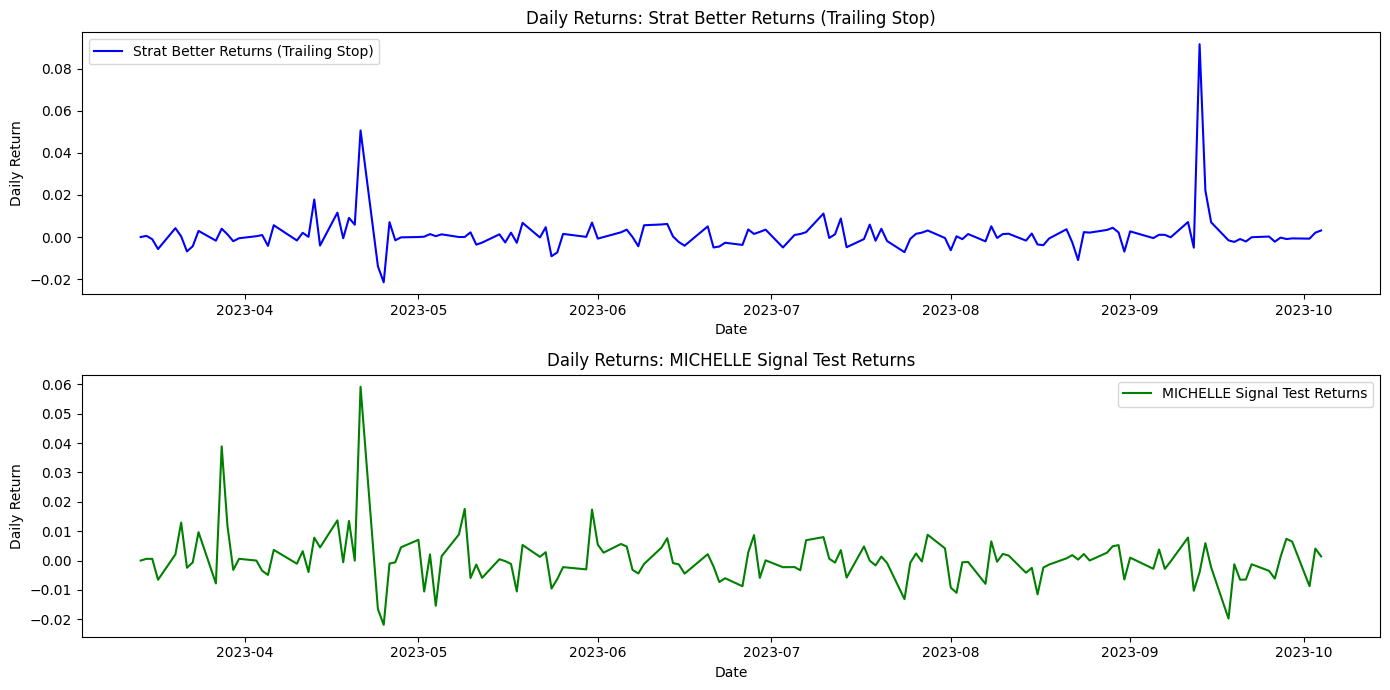


Metrics for Equities Strategy 1:
  Sharpe Ratio: 2.1879552996521916
  Sortino Ratio: 6.081368613694532
  Annualized Return: 41.62%
  Annualized Volatility: 15.92%

Metrics for Equities Strategy 2:
  Sharpe Ratio: 0.5970093842837695
  Sortino Ratio: 1.1209796365280804
  Annualized Return: 8.67%
  Annualized Volatility: 13.92%


In [2]:
# Portfolio Metrics - Equities Strategies only

# Get 13-week T-Bill rate from Yahoo Finance (symbol: ^IRX) using yahooquery
ticker = yq.Ticker('^IRX')
risk_free_data = ticker.history(period='1d', start='2000-01-01', end='2025-01-01')

# Extract the closing price and convert it to daily returns
risk_free_data['risk_free_rate'] = risk_free_data['adjclose'] / 100  # Convert to decimal
# Reset the index of risk_free_data to ensure there's no multi-index
risk_free_data.reset_index(inplace=True)
risk_free_data = risk_free_data[['date', 'risk_free_rate']]
risk_free_data['date'] = pd.to_datetime(risk_free_data['date'])

# Ensure the 'date' column is of string type, then slice the first 10 characters
df_equities_strat_better_returns_trailing_stop['date'] = df_equities_strat_better_returns_trailing_stop['date'].astype(str).str[:10]
df_equities_MICHELLE_signal_test_returns['date'] = df_equities_MICHELLE_signal_test_returns['date'].astype(str).str[:10]

# Convert the date column to datetime format
df_equities_strat_better_returns_trailing_stop['date'] = pd.to_datetime(df_equities_strat_better_returns_trailing_stop['date'])
df_equities_MICHELLE_signal_test_returns['date'] = pd.to_datetime(df_equities_MICHELLE_signal_test_returns['date'])

# Merge the risk-free rate with the equities dataframes on 'date'
df_equities_strat_better_returns_trailing_stop = pd.merge(
    df_equities_strat_better_returns_trailing_stop,
    risk_free_data[['date', 'risk_free_rate']],
    on='date',
    how='left'
)

df_equities_MICHELLE_signal_test_returns = pd.merge(
    df_equities_MICHELLE_signal_test_returns,
    risk_free_data[['date', 'risk_free_rate']],
    on='date',
    how='left'
)

# Plot the daily returns for both equity strategies
plt.figure(figsize=(14, 7))

# Plot df_equities_strat_better_returns_trailing_stop
plt.subplot(2, 1, 1)
plt.plot(df_equities_strat_better_returns_trailing_stop['date'], df_equities_strat_better_returns_trailing_stop['return'], label='Strat Better Returns (Trailing Stop)', color='blue')
plt.title('Daily Returns: Strat Better Returns (Trailing Stop)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()

# Plot df_equities_MICHELLE_signal_test_returns
plt.subplot(2, 1, 2)
plt.plot(df_equities_MICHELLE_signal_test_returns['date'], df_equities_MICHELLE_signal_test_returns['return'], label='MICHELLE Signal Test Returns', color='green')
plt.title('Daily Returns: MICHELLE Signal Test Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()

plt.tight_layout()
plt.show()

# Function to calculate Sharpe Ratio, Sortino Ratio, Annualized Return, and Volatility
def portfolio_metrics(df, strategy_name):
    # Sharpe Ratio
    excess_returns = df['return'] #- df['risk_free_rate']  # Excess return over risk-free rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)  # Assuming 252 trading days

    # Sortino Ratio
    downside_returns = excess_returns[excess_returns < 0]
    sortino_ratio = excess_returns.mean() / downside_returns.std() * np.sqrt(252)

    # Annualized Return and Volatility
    annualized_return = (1 + df['return'].mean())**252 - 1  # Annualized return
    annualized_volatility = df['return'].std() * np.sqrt(252)  # Annualized volatility

    # Print metrics
    print(f"\nMetrics for {strategy_name}:")
    print(f"  Sharpe Ratio: {sharpe_ratio}")
    print(f"  Sortino Ratio: {sortino_ratio}")
    print(f"  Annualized Return: {annualized_return * 100:.2f}%")
    print(f"  Annualized Volatility: {annualized_volatility * 100:.2f}%")

    return sharpe_ratio, sortino_ratio, annualized_return, annualized_volatility

# Metrics for df_equities_strat_better_returns_trailing_stop
sharpe_strat, sortino_strat, annualized_return_strat, annualized_volatility_strat = portfolio_metrics(df_equities_strat_better_returns_trailing_stop, "Equities Strategy 1")

# Metrics for df_equities_MICHELLE_signal_test_returns
sharpe_michelle, sortino_michelle, annualized_return_michelle, annualized_volatility_michelle = portfolio_metrics(df_equities_MICHELLE_signal_test_returns, "Equities Strategy 2")

# OVERLAY STRATEGIES

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Create PortfolioAnalyzer class for metrics calculations
class PortfolioAnalyzer:
    def __init__(self):
        self.risk_free_rate = 0.02  # Assumed annual risk-free rate
        self.trading_days = 252

    def calculate_metrics(self, returns_series, strategy_name):
        """Calculate comprehensive portfolio metrics"""
        # Basic return metrics
        total_return = (1 + returns_series).prod() - 1
        ann_return = (1 + returns_series.mean()) ** self.trading_days - 1
        ann_volatility = returns_series.std() * np.sqrt(self.trading_days)

        # Risk metrics
        excess_returns = returns_series - self.risk_free_rate/self.trading_days
        sharpe_ratio = np.sqrt(self.trading_days) * excess_returns.mean() / returns_series.std()

        downside_returns = returns_series[returns_series < 0]
        sortino_ratio = np.sqrt(self.trading_days) * excess_returns.mean() / downside_returns.std()

        max_drawdown = self.calculate_max_drawdown(returns_series)

        # Higher moments and additional metrics
        returns_skewness = skew(returns_series)
        returns_kurtosis = kurtosis(returns_series)
        var_95 = np.percentile(returns_series, 5)
        cvar_95 = returns_series[returns_series <= var_95].mean()
        win_rate = len(returns_series[returns_series > 0]) / len(returns_series)
        profit_factor = abs(returns_series[returns_series > 0].sum() / returns_series[returns_series < 0].sum())

        return {
            'Strategy': strategy_name,
            'Total Return': total_return,
            'Annualized Return': ann_return,
            'Annualized Volatility': ann_volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Sortino Ratio': sortino_ratio,
            'Maximum Drawdown': max_drawdown,
            'Skewness': returns_skewness,
            'Kurtosis': returns_kurtosis,
            'VaR (95%)': var_95,
            'CVaR (95%)': cvar_95,
            'Win Rate': win_rate,
            'Profit Factor': profit_factor,
            'Risk-Adjusted Return': ann_return / abs(max_drawdown) if max_drawdown != 0 else np.inf
        }

    def calculate_max_drawdown(self, returns_series):
        """Calculate maximum drawdown from returns series"""
        cum_returns = (1 + returns_series).cumprod()
        rolling_max = cum_returns.expanding().max()
        drawdowns = cum_returns / rolling_max - 1
        return drawdowns.min()

# Initialize analyzer
analyzer = PortfolioAnalyzer()

# Define strategy combinations
equity_strategies = [
    ('Eq_S1', df_equities_strat_better_returns_trailing_stop),
    ('Eq_S2', df_equities_MICHELLE_signal_test_returns)
]

# # List of options strategies and their returns dataframes
# option_strategies = [ # PARAMETERS ARE IN THIS FORMAT EXAMPLE :  delta_0_3_size_1_otm_True_dir_buy --> 0.3 delta threshold ; sizing 1 ; include out of the money options ; sell put & call options only
#     ('delta_0_3_size_1_otm_False_dir_sell', df_equal_weight_daily_returns_delta_0_3_size_1_otm_False_dir_sell),
#     ('delta_0_3_size_1_otm_True_dir_buy', df_equal_weight_daily_returns_delta_0_3_size_1_otm_True_dir_buy),
#     ('delta_0_3_size_1_otm_True_dir_sell', df_equal_weight_daily_returns_delta_0_3_size_1_otm_True_dir_sell),
#     ('delta_0_3_size_1_otm_False_dir_buy', df_equal_weight_daily_returns_delta_0_3_size_1_otm_False_dir_buy),
#     ('delta_0_3_size_2_otm_True_dir_sell', df_equal_weight_daily_returns_delta_0_3_size_2_otm_True_dir_sell),
#     ('delta_0_3_size_2_otm_True_dir_buy', df_equal_weight_daily_returns_delta_0_3_size_2_otm_True_dir_buy),
#     ('delta_0_size_1_otm_True_dir_buy', df_daily_returns_delta_0_size_1_otm_True_dir_buy),
#     ('delta_0_size_1_otm_True_dir_sell', df_daily_returns_delta_0_size_1_otm_True_dir_sell),
#     ('delta_0_size_2_otm_True_dir_buy', df_daily_returns_delta_0_size_2_otm_True_dir_buy),
#     ('delta_0_size_5_otm_True_dir_buy', df_daily_returns_delta_0_size_5_otm_True_dir_buy),
#     ('delta_0_size_2_otm_True_dir_sell', df_daily_returns_delta_0_size_2_otm_True_dir_sell),
#     ('delta_0_size_5_otm_True_dir_sell', df_daily_returns_delta_0_size_5_otm_True_dir_sell),
#     ('delta_0_size_1_otm_True_dir_buy', df_daily_returns_delta_0_size_1_otm_True_dir_buy),
#     ('delta_0_size_1_otm_True_dir_sell', df_daily_returns_delta_0_size_1_otm_True_dir_sell),
#     ('delta_0_size_2_otm_True_dir_buy', df_daily_returns_delta_0_size_2_otm_True_dir_buy),
#     ('delta_0_size_5_otm_True_dir_buy', df_daily_returns_delta_0_size_5_otm_True_dir_buy),
#     ('delta_0_size_2_otm_True_dir_sell', df_daily_returns_delta_0_size_2_otm_True_dir_sell),
#     ('delta_0_size_5_otm_True_dir_sell', df_daily_returns_delta_0_size_5_otm_True_dir_sell),
#     ('delta_0_9_size_50_otm_False_dir_sell', df_daily_returns_delta_0_9_size_50_otm_False_dir_sell),
#     ('delta_0_9_size_50_otm_True_dir_buy', df_daily_returns_delta_0_9_size_50_otm_True_dir_buy),
#     ('delta_0_9_size_50_otm_True_dir_sell', df_daily_returns_delta_0_9_size_50_otm_True_dir_sell),
# ]

# List of options strategies and their returns dataframes
option_strategies = [ # PARAMETERS ARE IN THIS FORMAT EXAMPLE :  d03_s1_otmF_s --> 0.3 delta threshold ; sizing 1 ; DO NOT include out of the money options ; sell put & call options only
    ('d03_s1_otmF_s', df_equal_weight_daily_returns_delta_0_3_size_1_otm_False_dir_sell),
    ('d03_s1_otmT_b', df_equal_weight_daily_returns_delta_0_3_size_1_otm_True_dir_buy),
    ('d03_s1_otmT_s', df_equal_weight_daily_returns_delta_0_3_size_1_otm_True_dir_sell),
    ('d03_s1_otmF_b', df_equal_weight_daily_returns_delta_0_3_size_1_otm_False_dir_buy),
    ('d03_s2_otmT_s', df_equal_weight_daily_returns_delta_0_3_size_2_otm_True_dir_sell),
    ('d03_s2_otmT_b', df_equal_weight_daily_returns_delta_0_3_size_2_otm_True_dir_buy),
    # ('d00_s1_otmT_b', df_daily_returns_delta_0_size_1_otm_True_dir_buy),
    # ('d00_s1_otmT_b', df_daily_returns_delta_0_size_1_otm_True_dir_sell),
    # ('d00_s2_otmT_b', df_daily_returns_delta_0_size_2_otm_True_dir_buy),
    # ('d00_s5_otmT_b', df_daily_returns_delta_0_size_5_otm_True_dir_buy),
    # ('d00_s2_otmT_s', df_daily_returns_delta_0_size_2_otm_True_dir_sell),
    # ('d00_s5_otmT_s', df_daily_returns_delta_0_size_5_otm_True_dir_sell),
    # ('d00_s1_otmT_b', df_daily_returns_delta_0_size_1_otm_True_dir_buy),
    # ('d00_s1_otmT_s', df_daily_returns_delta_0_size_1_otm_True_dir_sell),
    # ('d00_s2_otmT_b', df_daily_returns_delta_0_size_2_otm_True_dir_buy),
    # ('d00_s5_otmT_b', df_daily_returns_delta_0_size_5_otm_True_dir_buy),
    # ('d00_s2_otmT_s', df_daily_returns_delta_0_size_2_otm_True_dir_sell),
    # ('d00_s5_otmT_s', df_daily_returns_delta_0_size_5_otm_True_dir_sell),
    ('d09_s50_otmF_s', df_daily_returns_delta_0_9_size_50_otm_False_dir_sell),
    ('d09_s50_otmT_b', df_daily_returns_delta_0_9_size_50_otm_True_dir_buy),
    ('d09_s50_otmT_s', df_daily_returns_delta_0_9_size_50_otm_True_dir_sell),
]

# Process each combination of equity and options strategies
for equity_name, equity_df in equity_strategies:
    for option_name, option_df in option_strategies:
        strategy_name = f"{equity_name} + {option_name}"
        print(f"\nAnalyzing {strategy_name}...")

        # Merge equity and option returns on 'date'
        combined_df = pd.merge(
            equity_df[['date', 'return']].rename(columns={'return': 'equity_return'}),
            option_df[['date', 'daily_return']].rename(columns={'daily_return': 'option_return'}),
            on='date',
            how='inner'
        )

        # Group by date and sum returns for each day (assumes independent asset returns)
        grouped_df = combined_df.groupby('date', as_index=False).sum()

        # Calculate cumulative returns
        grouped_df['cumulative_strategy'] = (1 + grouped_df['equity_return'] + grouped_df['option_return']).cumprod()
        grouped_df['cumulative_equity'] = (1 + grouped_df['equity_return']).cumprod()

        # Create performance visualizations
        fig = plt.figure(figsize=(20, 12))

        # Plot 1: Cumulative Returns
        plt.subplot(2, 2, 1)
        plt.plot(grouped_df['date'], grouped_df['cumulative_strategy'], label="Equities + Options", color='blue')
        plt.plot(grouped_df['date'], grouped_df['cumulative_equity'], label="Equities Only", color='red', linestyle='dashed')
        plt.title(f'Cumulative Returns: {strategy_name}')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return')
        plt.legend()

        # Plot 2: Returns Distribution
        plt.subplot(2, 2, 2)
        sns.histplot(grouped_df['equity_return'] + grouped_df['option_return'], kde=True)
        plt.title('Returns Distribution')
        plt.xlabel('Daily Return')

        # Plot 3: Rolling Volatility (21-day)
        plt.subplot(2, 2, 3)
        rolling_vol = (grouped_df['equity_return'] + grouped_df['option_return']).rolling(window=21).std() * np.sqrt(252)
        plt.plot(grouped_df['date'], rolling_vol)
        plt.title('21-Day Rolling Volatility')
        plt.xlabel('Date')
        plt.ylabel('Annualized Volatility')

        # Plot 4: Drawdown Analysis
        plt.subplot(2, 2, 4)
        cum_returns = (1 + grouped_df['equity_return'] + grouped_df['option_return']).cumprod()
        rolling_max = cum_returns.expanding().max()
        drawdowns = (cum_returns / rolling_max - 1)
        plt.fill_between(grouped_df['date'], drawdowns, 0, color='red', alpha=0.3)
        plt.title('Drawdown Analysis')
        plt.xlabel('Date')
        plt.ylabel('Drawdown')

        plt.tight_layout()
        plt.show()


# Initialize list to store results
results = []

# Process each combination of equity and options strategies
for equity_name, equity_df in equity_strategies:
    for option_name, option_df in option_strategies:
        strategy_name = f"{equity_name} + {option_name}"
        print(f"\nAnalyzing {strategy_name}...")

        # Merge equity and option returns on 'date'
        combined_df = pd.merge(
            equity_df[['date', 'return']].rename(columns={'return': 'equity_return'}),
            option_df[['date', 'daily_return']].rename(columns={'daily_return': 'option_return'}),
            on='date',
            how='inner'
        )

        # Sum daily returns (assumes independent returns)
        combined_df['strategy_return'] = combined_df['equity_return'] + combined_df['option_return']

        # Calculate portfolio metrics
        metrics = analyzer.calculate_metrics(combined_df['strategy_return'], strategy_name)
        results.append(metrics)  # Ensure results are stored

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Check column names
print("\nAvailable Columns in results_df:", results_df.columns)

# Display top strategies by different metrics
metrics_to_analyze = ['Sharpe Ratio', 'Sortino Ratio', 'Risk-Adjusted Return', 'Total Return']

print("\nTop Strategies Analysis:")
for metric in metrics_to_analyze:
    if metric in results_df.columns:
        print(f"\nTop 3 Strategies by {metric}:")
        display(results_df.nlargest(3, metric)[['Strategy', metric, 'Annualized Return', 'Maximum Drawdown', 'Win Rate']])

        print(f"\nBottom 3 Strategies by {metric}:")
        display(results_df.nsmallest(3, metric)[['Strategy', metric, 'Annualized Return', 'Maximum Drawdown', 'Win Rate']])
    else:
        print(f"Warning: {metric} not found in results_df.")


# Create and plot correlation matrix
correlation_matrix = pd.DataFrame()
for equity_name, equity_df in equity_strategies:
    for option_name, option_df in option_strategies:
        # Combine strategies
        combined_df = pd.merge(
            equity_df[['date', 'return']],
            option_df[['date', 'daily_return']],
            on='date',
            how='inner'
        )
        combined_df['strategy_return'] = combined_df['return'] + combined_df['daily_return']
        combined_df = combined_df.groupby('date')['strategy_return'].mean().reset_index()

        correlation_matrix[f"{equity_name}_{option_name}"] = combined_df['strategy_return']

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Strategy Correlation Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save results to CSV
results_df.to_csv('strategy_analysis_results.csv', index=False)
print("\nDetailed results have been saved to 'strategy_analysis_results.csv'")

Output hidden; open in https://colab.research.google.com to view.

date       object
return    float64
dtype: object
          date  strategy_return    return
0   2023-03-14         0.003476  0.015027
1   2023-03-15         0.003467 -0.012400
2   2023-03-16         0.002350  0.002306
3   2023-03-17        -0.002145 -0.022114
4   2023-03-20         0.007956  0.003660
..         ...              ...       ...
114 2023-08-25         0.004921  0.011180
115 2023-08-28         0.006556  0.003050
116 2023-08-29         0.007247  0.004561
117 2023-08-30         0.004481  0.004919
118 2023-08-31        -0.004679 -0.006024

[119 rows x 3 columns]


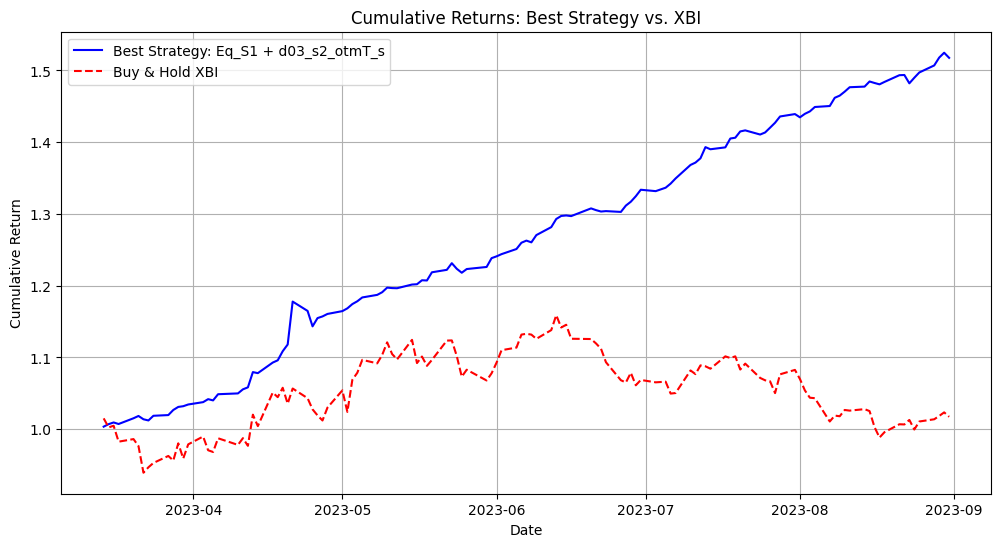


Performance Comparison:
                               Strategy  Total Return  Annualized Return  \
0  Best Strategy: Eq_S1 + d03_s2_otmT_s      0.517581           1.432250   
1                        Buy & Hold XBI      0.017210           0.068743   

   Annualized Volatility  Sharpe Ratio  Sortino Ratio  Maximum Drawdown  \
0               0.106515      8.171508      13.529175         -0.029314   
1               0.247845      0.187584       0.334102         -0.147179   

   Skewness   Kurtosis  VaR (95%)  CVaR (95%)  Win Rate  Profit Factor  \
0  3.215197  25.218159  -0.004495   -0.008808  0.789916       5.919342   
1  0.329369   0.363499  -0.022194   -0.029247  0.487395       1.043927   

   Risk-Adjusted Return  
0             48.858192  
1              0.467069  


In [23]:
from datetime import tzinfo
from yahooquery import Ticker

def get_xbi_data(start_date, end_date):
    xbi = Ticker("XBI")
    xbi_data = xbi.history(start=start_date, end=end_date)
    xbi_data = xbi_data.reset_index()
    xbi_data['return'] = xbi_data['close'].pct_change()
    xbi_data = xbi_data.dropna()
    return xbi_data[['date', 'return']]


# Load XBI data for comparison
xbi_returns = get_xbi_data(start_date="2010-01-01", end_date="2025-12-31")
print(xbi_returns.dtypes)


# Determine the best strategy based on Sharpe Ratio
best_strategy = None
best_sharpe = -np.inf

for equity_name, equity_df in equity_strategies:
    for option_name, option_df in option_strategies:
        strategy_name = f"{equity_name} + {option_name}"
        combined_df = pd.merge(
            equity_df[['date', 'return']].rename(columns={'return': 'equity_return'}),
            option_df[['date', 'daily_return']].rename(columns={'daily_return': 'option_return'}),
            on='date',
            how='inner'
        )
        combined_df['strategy_return'] = combined_df['equity_return'] + combined_df['option_return']
        metrics = analyzer.calculate_metrics(combined_df['strategy_return'], strategy_name)

        if metrics['Sharpe Ratio'] > best_sharpe:
            best_sharpe = metrics['Sharpe Ratio']
            best_strategy = (strategy_name, combined_df)

# Merge best strategy with XBI returns for comparison
if best_strategy:
    best_name, best_df = best_strategy
    # Ensure dates are in datetime format and timezone-naive
    # Ensure all dates are converted to datetime and timezone-naive
    xbi_returns['date'] = pd.to_datetime(xbi_returns['date'], utc=True).dt.tz_localize(None)
    best_df['date'] = best_df['date'].dt.tz_localize(None)


    # Merge best strategy with XBI returns for comparison
    merged_df = pd.merge(
        best_df[['date', 'strategy_return']],
        xbi_returns,
        on='date',
        how='inner',
        suffixes=('_best', '_xbi')
    )

   # merged_df = pd.merge(best_df[['date', 'strategy_return']], xbi_returns, on='date', how='inner', suffixes=('_best', '_xbi'))
    print(merged_df)
    # Calculate cumulative returns
    merged_df['cumulative_best'] = (1 + merged_df['strategy_return']).cumprod()
    merged_df['cumulative_xbi'] = (1 + merged_df['return']).cumprod()

    # Plot cumulative returns comparison
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['date'], merged_df['cumulative_best'], label=f'Best Strategy: {best_name}', color='blue')
    plt.plot(merged_df['date'], merged_df['cumulative_xbi'], label='Buy & Hold XBI', color='red', linestyle='dashed')
    plt.title('Cumulative Returns: Best Strategy vs. XBI')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.show()

    # Print final metrics
    best_metrics = analyzer.calculate_metrics(merged_df['strategy_return'], f'Best Strategy: {best_name}')
    xbi_metrics = analyzer.calculate_metrics(merged_df['return'], 'Buy & Hold XBI')

    print("\nPerformance Comparison:")
    print(pd.DataFrame([best_metrics, xbi_metrics]))


Explain process ; clear economic intuition ; what causes spikes and sharp declines ; logic for strategies ; why do they work ; how you measure their performance ; where are option traders losing pnl? leverage ; why are you better suited to do an options strategy , especially if it's attractive?

how do you convince skeptics ; ineffiecnvies and how to capture them. wednesday ; review ; wednesday